
First 5 Rows of Data:
       Event Name  Event Date  Overall Rating  \
0       Tech Fest  2024-10-12               5   
1  Cultural Night  2024-09-25               4   
2     Workshop AI  2024-11-01               3   
3      Sports Day  2024-08-20               4   
4         Seminar  2024-10-05               2   

       What did you like about the event?            What could be improved?  \
0  Great organization and fun activities!   More food options would be nice.   
1         Amazing performances and crowd.  Better lighting and sound system.   
2       Useful content and good speakers.        Time management needs work.   
3     Energetic and well-managed matches.          Need more water stations.   
4            Informative but too lengthy.              Shorten the sessions.   

  Would you attend again?              Any other comments?  
0                     Yes                        Loved it!  
1                     Yes           Keep up the good work!  
2                 

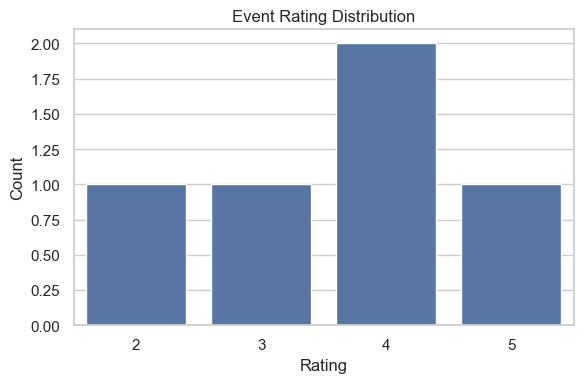

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_26568\3647627835.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Like_Sentiment', data=df, palette='pastel')


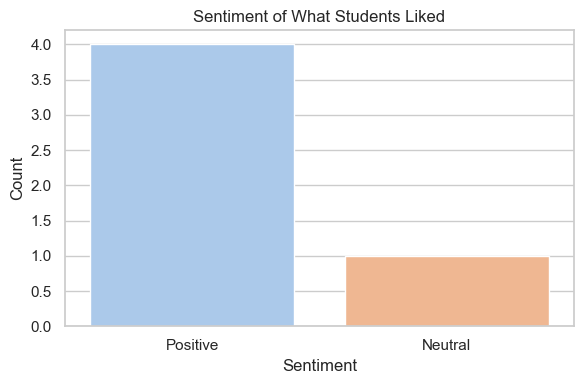

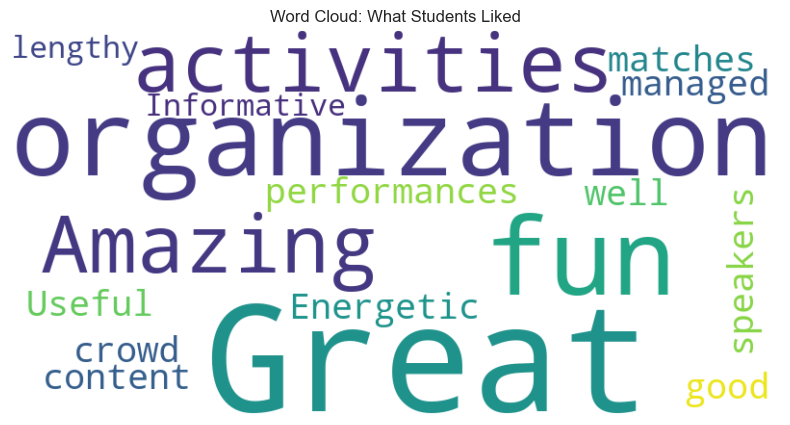

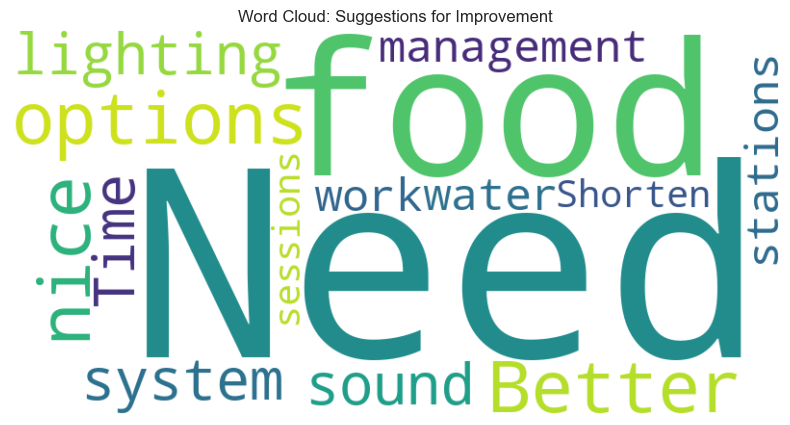


Sentiment Counts:
Like_Sentiment
Positive    4
Neutral     1
Name: count, dtype: int64

Average Rating:
3.6

Top Suggestions for Improvement:
What could be improved?
More food options would be nice.     1
Better lighting and sound system.    1
Time management needs work.          1
Need more water stations.            1
Shorten the sessions.                1
Name: count, dtype: int64


In [1]:
# College Event Feedback Analysis

#  Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

#  the Survey Data 
df = pd.read_csv("data/feedback.csv") 
print("\nFirst 5 Rows of Data:")
print(df.head())


print("\nColumns in dataset:")
print(df.columns)


feedback_cols = ['What did you like about the event?', 'What could be improved?']
df.dropna(subset=feedback_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

#  Sentiment Analysis 
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


df['Like_Sentiment'] = df['What did you like about the event?'].apply(get_sentiment)

#  Visualize Rating Distribution 
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Overall Rating', data=df)
plt.title('Event Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#   Visualize Sentiment 
plt.figure(figsize=(6, 4))
sns.countplot(x='Like_Sentiment', data=df, palette='pastel')
plt.title('Sentiment of What Students Liked')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#   Word Cloud for Likes 
like_text = ' '.join(df['What did you like about the event?'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(like_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: What Students Liked")
plt.show()

#   Word Cloud for Improvements 
improve_text = ' '.join(df['What could be improved?'].dropna())
improve_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(improve_text)
plt.figure(figsize=(10, 5))
plt.imshow(improve_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Suggestions for Improvement")
plt.show()

#  Summary Stats 
print("\nSentiment Counts:")
print(df['Like_Sentiment'].value_counts())

print("\nAverage Rating:")
print(df['Overall Rating'].mean())

print("\nTop Suggestions for Improvement:")
print(df['What could be improved?'].value_counts().head())
